# Maternal Health Risk Dataset

This is a machine learning classification problem. I am using th[e Maternal Health Ri](https://www.archive.ics.uci.edu/dataset/863/maternal+health+risk)sk dataset. It has six feature columns:
- `Age`
- `SystolicBP`
- `DiastolicBP`
- `BS`
- `BodyTemp`
- `HeartRate`
- `RiskLevel`

There are 3 class values:
- `high risk`
- `low risk`
- `mid risk`

### Creators
**Marzia Ahmed**

### License
This dataset is licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.  
This allows for the sharing and adaptation of the dataset for any purpose, provided that appropriate credit is given.
 given..k

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [42]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [44]:
data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [296]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [48]:
X = data.iloc[:,:6]
T = data.iloc[:,6:7]

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

le.fit(T["RiskLevel"])
T = pd.DataFrame(le.transform(T["RiskLevel"]),columns = ["Target"])

In [202]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X,columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
vis_df = pd.concat([X,T],axis = 1)

In [204]:
X.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1.014000e+03,1.014000e+03,1.014000e+03,1.014000e+03,1.014000e+03,1.014000e+03
mean,-2.102197e-17,-7.007325e-18,1.401465e-17,-9.635072e-18,1.401465e-17,-1.051099e-17
std,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00
min,-1.475511e+00,-2.348389e+00,-1.978576e+00,-8.280872e-01,-4.852155e-01,-8.324572e+00
25%,-8.072472e-01,-7.174962e-01,-8.257508e-01,-5.546894e-01,-4.852155e-01,-5.320876e-01
50%,-2.874866e-01,3.697655e-01,2.550228e-01,-3.724243e-01,-4.852155e-01,2.100538e-01
75%,6.777830e-01,3.697655e-01,9.755385e-01,-2.205366e-01,-4.852155e-01,7.048148e-01
max,2.979580e+00,2.544289e+00,1.696054e+00,3.120991e+00,3.162534e+00,1.941717e+00


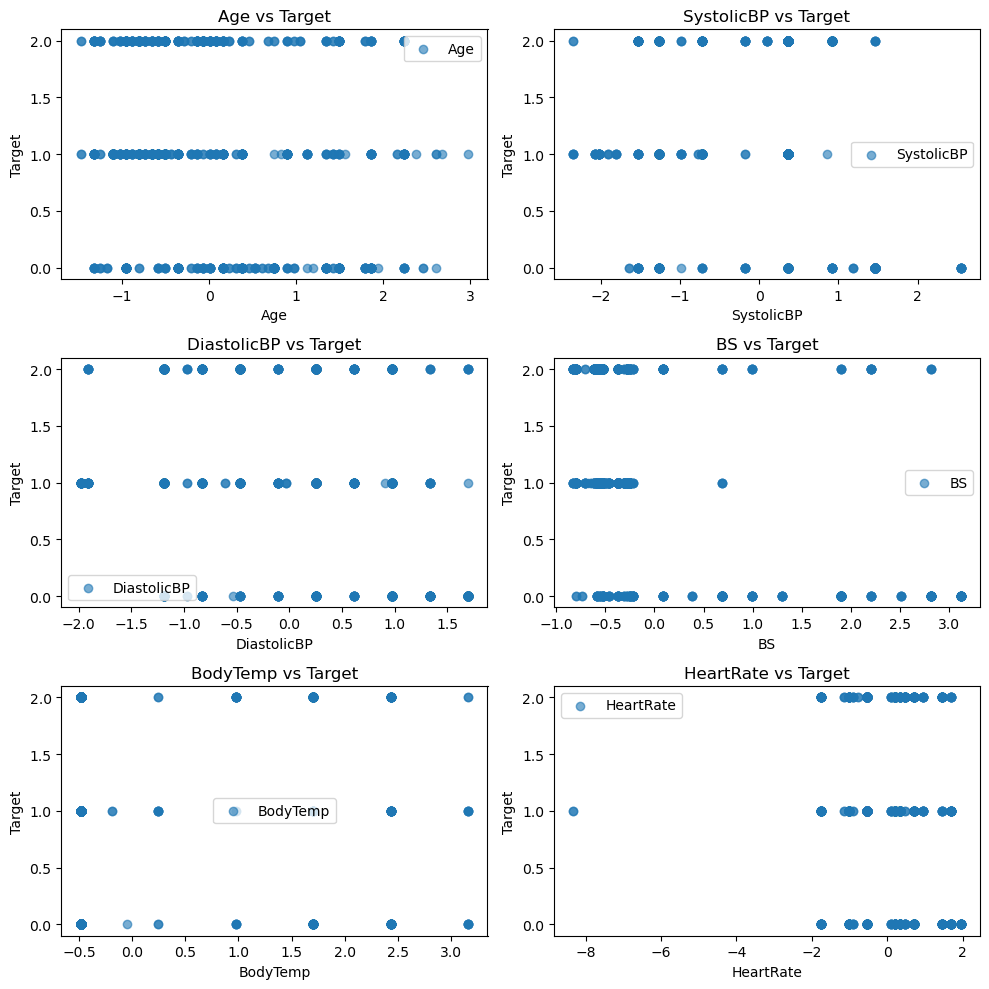

In [86]:
import matplotlib.pyplot as plt

features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, feature in zip(axs, features):
    ax.scatter(X[feature], T["Target"], label=feature, alpha=0.6)
    ax.set_xlabel(feature)
    ax.set_ylabel("Target")
    ax.legend()
    ax.set_title(f'{feature} vs Target')

plt.tight_layout()
plt.show()

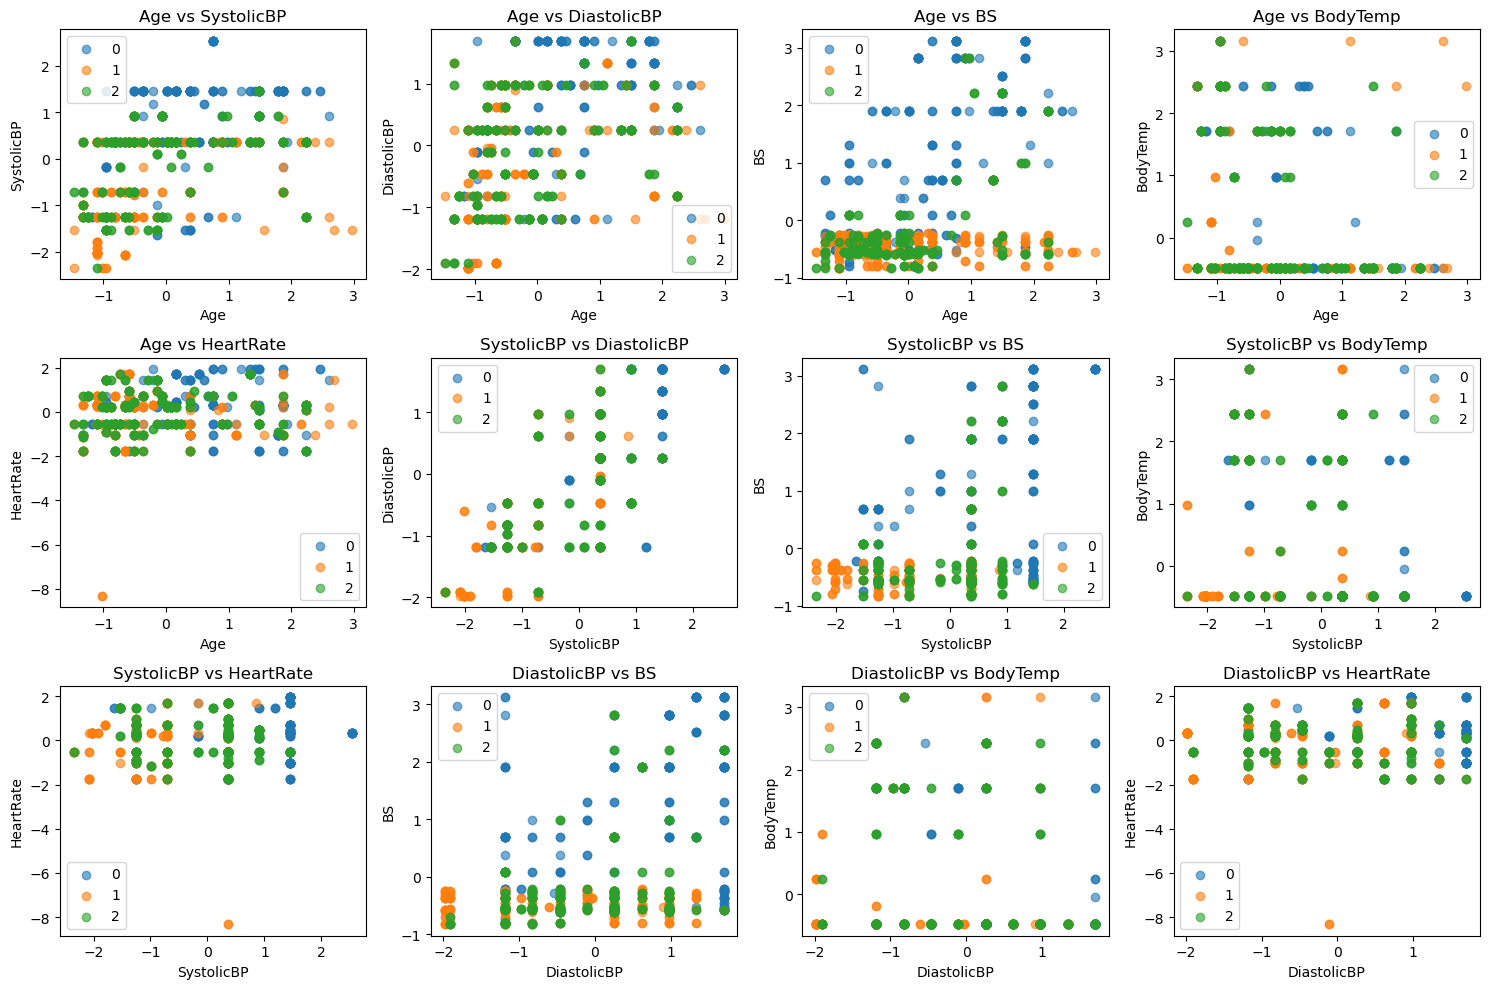

In [206]:
import itertools

loc_0 = vis_df[vis_df["Target"] == 0]
loc_1 = vis_df[vis_df["Target"] == 1]
loc_2 = vis_df[vis_df["Target"] == 2]

features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

combinations = list(itertools.combinations(features, 2))

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()

for ax, (x_feature, y_feature) in zip(axs, combinations):
    ax.scatter(loc_0[x_feature], loc_0[y_feature], label='0', alpha=0.6)
    ax.scatter(loc_1[x_feature], loc_1[y_feature], label='1', alpha=0.6)
    ax.scatter(loc_2[x_feature], loc_2[y_feature], label='2', alpha=0.6)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.set_title(f'{x_feature} vs {y_feature}')

plt.tight_layout()
plt.show()

In [320]:
from sklearn.model_selection import train_test_split

def data_splitting(data,target):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
    return  X_train, X_test, y_train, y_test

X_train, X_test, t_train, t_test = data_splitting(X,T.to_numpy().ravel())
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

In [276]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [286]:
import warnings

warnings.filterwarnings("ignore")

def data_splitting(data,target):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=45)
    return  X_train, X_test, y_train, y_test

X_train, X_test, t_train, t_test = data_splitting(X,T.to_numpy().ravel())

ridge = RidgeClassifier()
perceptron = Perceptron()
sgd = SGDClassifier()
svm = LinearSVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
nb = BernoulliNB()

clfs = [ ridge, perceptron, sgd, svm, logreg, knn, nb]
names = ["Ridge", "Perceptron", "SGD", "SVM", "Logistic Regression", "kNN", "Naive Bayes"]

train_accs = []
test_accs = []

for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    # TODO 8.2
    if name == "kNN":
        clf = knn
    else:
        clf = OneVsRestClassifier(clf)
    clf.fit(X_train,t_train)
    train_score = clf.score(X_train,t_train)
    test_score = clf.score(X_test,t_test)
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    y_train = clf.predict(X_train)
    
    y_test = clf.predict(X_test)

    train_accs.append(train_score)
    test_accs.append(test_score)

======================Ridge=======================
Train Accuracy: 0.6313193588162762
Test Accuracy: 0.6650246305418719
====================Perceptron====================
Train Accuracy: 0.5203452527743526
Test Accuracy: 0.5123152709359606
=======================SGD========================
Train Accuracy: 0.5844636251541308
Test Accuracy: 0.5911330049261084
=======================SVM========================
Train Accuracy: 0.6461159062885327
Test Accuracy: 0.6748768472906403
===============Logistic Regression================
Train Accuracy: 0.6411837237977805
Test Accuracy: 0.6798029556650246
=======================kNN========================
Train Accuracy: 0.8828606658446363
Test Accuracy: 0.729064039408867
===================Naive Bayes====================
Train Accuracy: 0.6041923551171393
Test Accuracy: 0.5615763546798029


[Text(0, 0, 'Ridge'),
 Text(1, 0, 'Perceptron'),
 Text(2, 0, 'SGD'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Logistic Regression'),
 Text(5, 0, 'kNN'),
 Text(6, 0, 'Naive Bayes')]

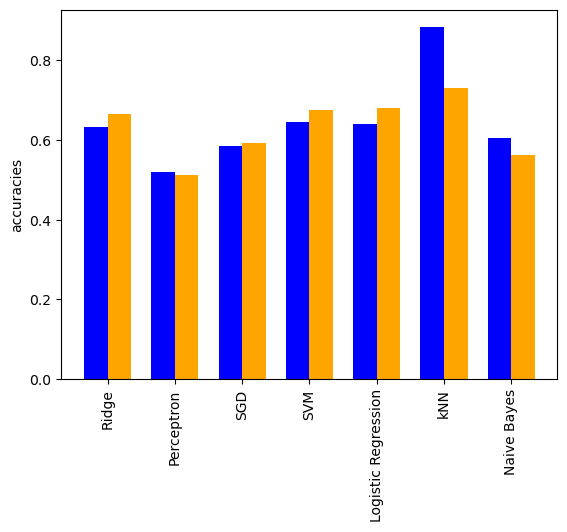

In [293]:
x = np.arange(len(names))
width = 0.35

fig, ax = plt.subplots()

bar1 = ax.bar(x - width/2, train_accs, width, label='Values 1', color='b')
bar2 = ax.bar(x + width/2, test_accs, width, label='Values 2', color='orange')

ax.set_ylabel('accuracies')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=90)

`Summary`: To tackle this problem, I straight up imported matplotlib, and performed all-combinations of scatter plots ¬– feature-feature and feature-target. It is evident from all the plots that the data is not distributed with very distinct partitions. Often there is no correlation or any visual method by which we can separate the target values.

So to get quick benchmark, I applied `LabelEncoder` and `StandardScaler` on features. I fed the `X` and `T` datasets to 7 models discussed in this lab. For every model, I applied `OneVsRestClassifier` but for `kNN`. Set `n_neighbors = 3` for `kNN` and calculated train and test scores.

kNN has worked relatively better than the other models -

Train Accuracy: 0.8754623921085081
Test Accuracy: 0.7536945812807881

Still, not very satisfactory.